## Task 1

In [69]:
import numpy as np
import math 
import matplotlib.pyplot as plt


### Task 2e

De Casteljau's algorithm 

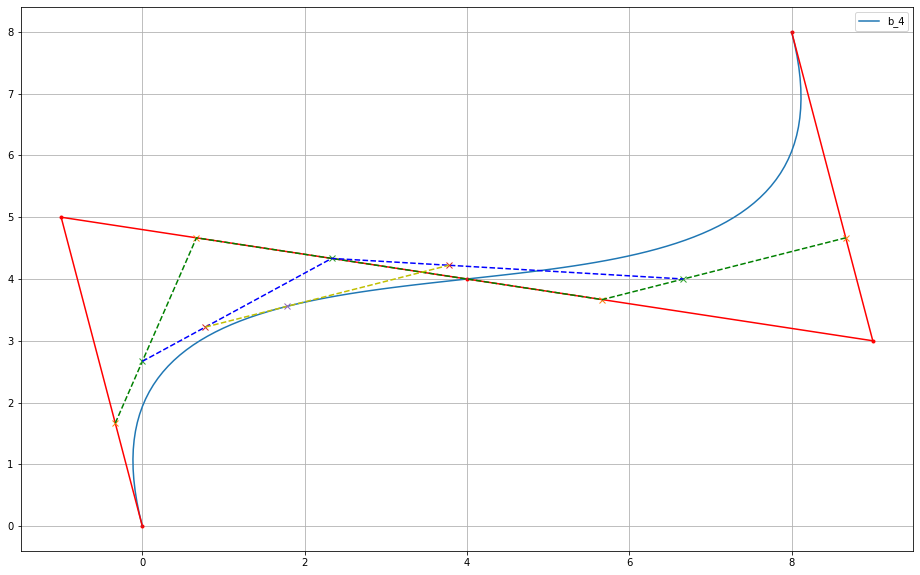

In [70]:
def de_Casteljau(P,t0):
    '''
    function that implements the de Casteljau algorithm

    input:
        P: vector of points we want to make a Bezier Curve for 
        t0: t-parameter 
    output:
        Pvecs[-1,0]: the point on the Bezier curve for t0 
        Pvecs[:,0]: vector of points for every "level" k considered 
    '''
    n,d = np.shape(P) #get dimentions of P 
    Pvecs = np.zeros((n, n, d)) #create matrix of points  
    Pvecs[0,:] = P #initialize the matrix 
    for k in range(1,n): #double for-loop to calculate the Bezier curve at t0 
        for i in range(0,n-k):
            Pvecs[k,i] = (1-t0) * Pvecs[k-1,i] + t0 * Pvecs[k-1, i+1] #de Casteljau's algorithm 
    return Pvecs[-1,0], Pvecs
    

p0 = [0,0]; p1 = [-1,5]; p2 = [4,4]; p3 = [9,3]; p4 = [8,8] #points that we want to make our Bezier curve for 
P = np.array([p0, p1, p2, p3, p4]) #make it into numpy array 


T = np.linspace(0,1, 100) #our time interval 

Pvecs = np.zeros((len(T),  2))#our bezier curve for different k-levels 
Pvecs2 = np.zeros((len(T), len(P),len(P), 2))
for t in range(len(T)): #for loop that uses de Casteljaus algrorithm 
    Pvecs[t] = de_Casteljau(P, T[t])[0]

plt.figure(figsize = (16,10))    
plt.plot(P[:,0], P[:,1], 'r.') #plot the points we want to make Bezier curve for 

plt.plot(Pvecs[:,0], Pvecs[:,1], label = f'b_4')

points2 = de_Casteljau(P, 1/3)[1]

plt.plot(points2[0,:,0], points2[0,:,1], 'r-')  
plt.plot(points2[1,:4,0], points2[1,:4,1], 'x')
plt.plot(points2[1,:4,0], points2[1,:4,1], 'g--')
plt.plot(points2[2,:3,0], points2[2,:3,1], 'x')
plt.plot(points2[2,:3,0], points2[2,:3,1], 'b--')
plt.plot(points2[3,:2,0], points2[3,:2,1], 'x')
plt.plot(points2[3,:2,0], points2[3,:2,1],'y--')   
plt.plot(points2[4,:1,0], points2[4,:1,1], 'x')
plt.grid(True)
plt.legend()

### Task 3 a

Composite Bezier curve 

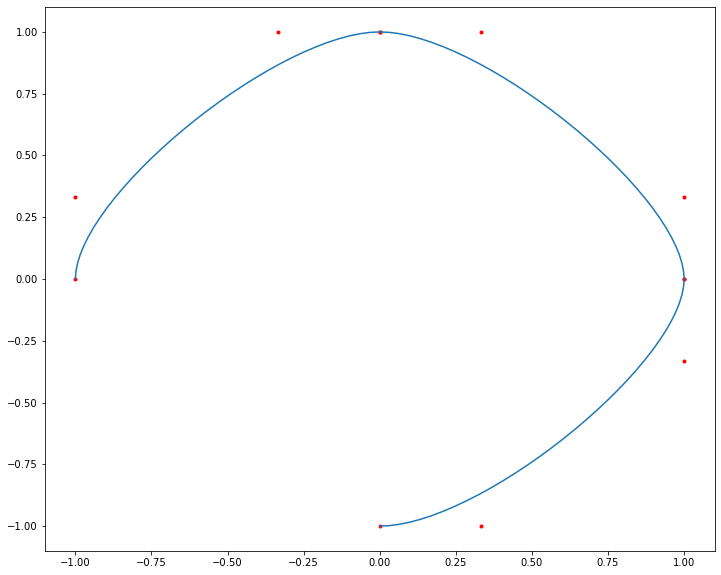

In [71]:
def composite_Bezier(P,t):
    '''
    Computes the composite Nezier curve for a set of points P on time interval t 
    input:
        P: points we want to compute the Bezier curve for
        t: time interval points 
    output:
        B: Bezier curve as a function of time, t
    '''
    B = np.zeros((len(t),2)) #array for our Bezier curve 
    i = 0 #indicator of the segment 
    for k in range(len(t)): 
        B[k] = de_Casteljau(P[:,i],t[k]-i)[0] #compute Bezier curve at a discrete point 
        if(int(np.floor(t[k])>i)): #if test that changes the segment 
            i+=1
    return B 
    
P = np.zeros((4, 3, 2)) #the points we want to make Bezier cruve for
P[0,0] = [-1,0];P[1,0] = [-1,1/3]; P[2,0] = [-1/3, 1]; P[3,0] = [0,1]
P[0,1] = [0,1];P[1,1] = [1/3,1]; P[2,1] = [1, 1/3]; P[3,1] = [1,0]
P[0,2] = [1,0];P[1,2] = [1,-1/3]; P[2,2] = [1/3, -1]; P[3,2] = [0,-1]

T = np.linspace(0,3,100) #time array 
B = composite_Bezier(P,T) #Bezier curve 
plt.figure(figsize = (12,10))
plt.plot(P[:,:,0], P[:,:,1], 'r.')
plt.plot(B[:,0], B[:,1])

### Task 3 b 

Construct algorithm for periodic composite cubic Bezier curve 

$$
\mathbf{B}(t) = \left\{ b_3(t - i +1; \mathbf{p}_{0,i}, \mathbf{p}_{1,i}, \mathbf{p}_{2,i}, \mathbf{p}_{3,i})  
\right. = \left\{ b_3(t - i +1; \mathbf{a}_{i}, \frac{\mathbf{v}_{i}}{3} + \mathbf{a}_{i}, \mathbf{a}_{i+1}-\frac{\mathbf{v}_{i+1}}{3} ,\mathbf{a}_{i+1} )  
\right.
$$

[[0.  1. ]
 [1.  1. ]
 [1.  0. ]
 [0.5 1. ]
 [0.  0. ]]


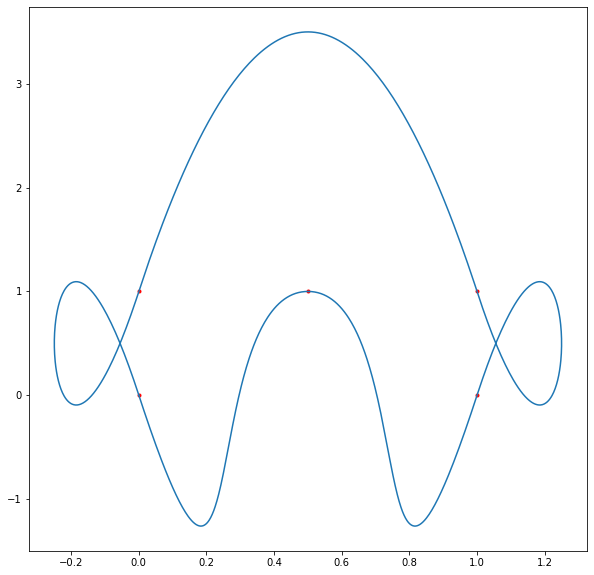

In [2018]:
def interpolate_periodic(A,V):
    ''' 
    Function that uses the properties of Bezier curve to periodically interpolate points and its velocities 
    The functions returns control points for a Bezier curve 
    
    input: 
        A: datapoints we want to interpolate
        V: velocities at the datapoints
    output:
        P: control points for a Bezier curve 
    '''
    m,d = np.shape(A) #get shape of A 
    P = np.zeros((4,m,d)) #cinstruct array that contains our controlpoints
    for i in range(m-1):
        P[0,i] = A[i]
        P[1,i] = A[i] + V[i]/3
        P[2,i] = A[i+1] - V[i+1]/3
        P[3,i] = A[i+1]
    
    P[0,-1] = A[-1]
    P[1,-1] = A[-1] + V[-1]/3
    P[2,-1] = A[0] - V[0]/3
    P[3,-1] = A[0]
        
    return P

A = np.array([[0,0], [0,1], [1,1], [1,0], [0.5,1]])
m,d = np.shape(A)
V = np.array([[-1,10], [1,10], [1,-10], [-1,-10], [-1,0]])
P2 = interpolate_periodic(A,V)
T2 = np.linspace(0,m,1000)

curve = composite_Bezier(P2,T2)
plt.figure(figsize = (10,10))
plt.plot(P2[0,:,0], P2[0,:,1], 'r.')
plt.plot(curve[:,0], curve[:,1])
print(P2[-1])


### Task 3c 



<ipython-input-2182-56962612f56b>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


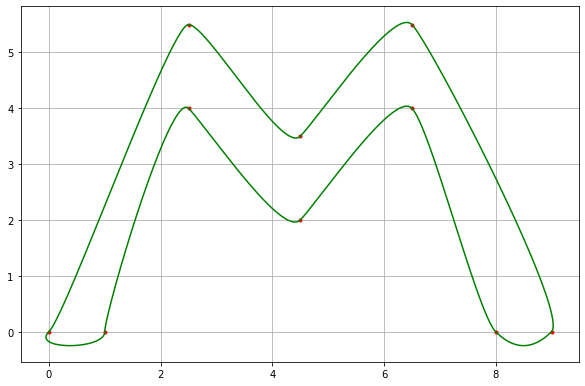

In [2182]:
M = np.array([[0,0], [2.5, 5.5],  [4.5, 3.5], [6.5,5.5], [9,0], [8,0], [6.5,4], [4.5, 2], [2.5,4],[1,0]])
MV = np.array([[1,1], [1, 0],  [1, 1], [1,-1], [-1,-1], [-1,1], [-1,1], [-1,-1], [-1,1], [0,-1], [0,-1]])
m,d = np.shape(M)
T_M = np.linspace(0,m,1000)
P_M = interpolate_periodic(M,MV)


curve_M = composite_Bezier(P_M,T_M)
plt.figure(figsize =(10,10))
plt.plot(P_M[0,:,0],P_M[0,:,1], 'r.')
plt.plot(curve_M[:,0], curve_M[:,1], 'g')
plt.grid()
plt.axes().set_aspect('equal')

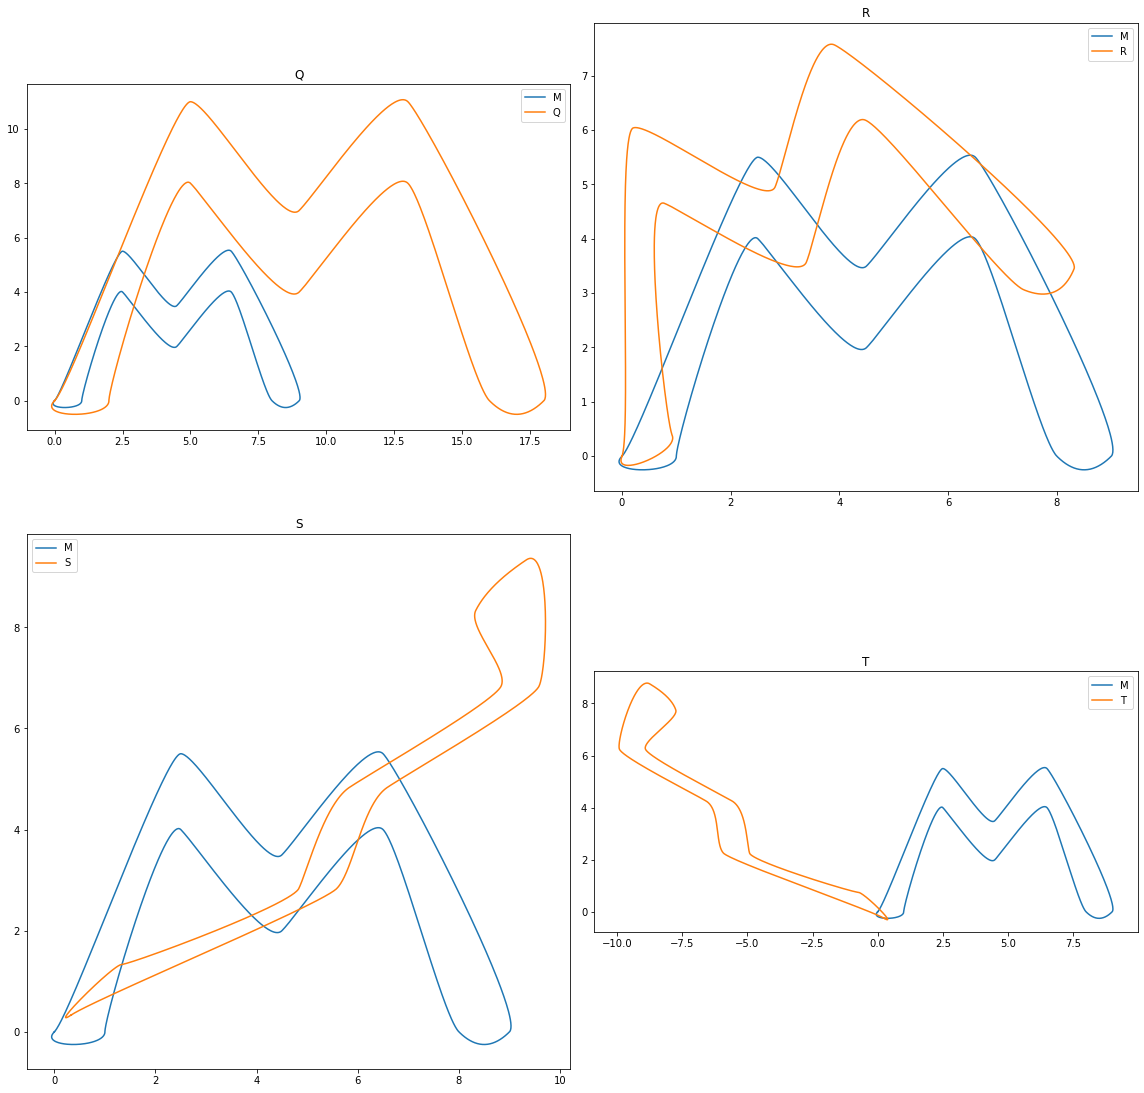

In [2183]:
Q = 2 * P_M.copy()

theta = np.pi/8
R_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
R = np.zeros(np.shape(P_M))

S_matrix = np.array([[1, 1/2], [1, 0]])
cs = 1/3 * np.array([1,1])
S = np.zeros(np.shape(P_M))

T_matrix = np.array([[-1, -2/3], [1, 0]])
T = np.zeros(np.shape(P_M))
ct = 1/4 * np.array([1,-1])

for i in range(np.shape(P_M)[0]):
    for j in range(np.shape(P_M)[1]):
        R[i,j] = R_matrix @ P_M[i,j] 
        S[i,j] = S_matrix @ P_M[i,j] + cs 
        T[i,j] = T_matrix @ P_M[i,j] + ct


curve_Q = composite_Bezier(Q, T_M)        
curve_R = composite_Bezier(R, T_M)
curve_S = composite_Bezier(S, T_M)
curve_T = composite_Bezier(T, T_M)


fig, axes = plt.subplots(2,2, figsize = (16,16))


axes[0,0].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[0,0].plot(curve_Q[:,0], curve_Q[:,1], label = f'Q')
axes[0,0].set_aspect('equal')
axes[0,0].set_title(f'Q')
axes[0,0].legend()


axes[0,1].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[0,1].plot(curve_R[:,0], curve_R[:,1], label = f'R')
axes[0,1].set_aspect('equal')
axes[0,1].set_title(f'R')
axes[0,1].legend()

axes[1,0].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[1,0].plot(curve_S[:,0], curve_S[:,1], label = f'S')
axes[1,0].set_aspect('equal')
axes[1,0].set_title(f'S')
axes[1,0].legend()

axes[1,1].plot(curve_M[:,0], curve_M[:,1], label = f'M')
axes[1,1].plot(curve_T[:,0], curve_T[:,1], label = f'T')
axes[1,1].set_aspect('equal')
axes[1,1].set_title(f'T')
axes[1,1].legend()

plt.tight_layout()


For each of the mappings $\mathbf{Q}$, $\mathbf{R}$, $\mathbf{S}$ and $\mathbf{T}$ we get shear mappings. A shear mapping is mapping that displaces a image along fixed direction, rotates and/or streches the iamge. 

For $\mathbf{Q}$ we get a scaled version of $\mathbf{M}$. Each point $\mathbf{p}_{i,j}$ is displaced a factor of $2$ in ${x}$ and ${y}$ direction

For $\mathbf{R}$ we recoginize $\begin{pmatrix} \cos(\frac{\pi}{8}) & - \sin(\frac{\pi}{8}) \\ \sin(\frac{\pi}{8}) & \cos(\frac{\pi}{8})\end{pmatrix}$ as the rotation matrix with an angle $\frac{\pi}{8}$. After applying the rotation matrix on all the points in $\mathbf{M}$ we get a rotated version of $\mathbf{M}$

For $\mathbf{S}$  we get the displacement of every point such that $\mathbf{s}_{i,j} =  \begin{pmatrix} 1 & \frac{1}{2} \\ 1 & 0 \end{pmatrix} \mathbf{p}_{i,j} + \frac{1}{3}\begin{pmatrix} 1 \\ 1\end{pmatrix}= \begin{pmatrix} x_{i,j} + \frac{1}{2} y_{i,j} + \frac{1}{3}\\ x_{i,j} + \frac{1}{3}\end{pmatrix}$. We see that all y-values get replaced by the original x-values $-\frac{1}{4}$. The x-values is displaced på the original y-values + $\frac{1}{4}$. The new curve is a M flipped upside down, strechted, displaced $\frac{1}{4}$ in x-direction and displaced $-\frac{1}{4}$ in y-direction

In [2493]:
def bezier_curve(P,T):
    Pvecs = np.zeros((len(T),  2))#our bezier curve for different k-levels 
    for t in range(len(T)): #for loop that uses de Casteljaus algrorithm 
        Pvecs[t] = de_Casteljau(P, T[t])[0]    
    return Pvecs

def compress_P(P):
    n,m,d = np.shape(P)
    Q_M = []
    l = 0 
    for j in range(m):
        for i in range(2):
            Q_M.append(P[i,j])

    Q_M.append(P[-2,-1])
    Q_M.append(P[-1,-1])
    return np.array(Q_M)

def make_grid(P):
    m = int(len(P)/4)
    l = 0
    Q = np.zeros((4, m, 2))
    for i in range(m):
        for j in range(4):
            Q[j,i] = P[l]
            l +=1 
    return Q

def gradient_F_tilde(Q): 
    return 12*np.array([2*Q[0] - 3*Q[1] + Q[3], -3*Q[0] + 6*Q[1] - 3*Q[2], -3*Q[1] + 6*Q[2] - 3*Q[3], Q[0] - 3*Q[2] + 2*Q[3]])    

def gradient_Descent(D, P, n, l):
    for i in range(n):
        P= P -0.001*(gradient_F_tilde(P) + gradient_H(D, P, l))
    return P

def gradient_G(P,D,l):
    grad_F = np.zeros_like(P)
    #grad_F[:2] = gradient_F_tilde(P[:4])[:2] 
    it = 0
    Q = []
    for i in range(0, len(P)-2,2):
        Q.append(P[i])
        Q.append(P[i+1])
        Q.append(2*P[i+2]- P[i+3])
        Q.append(P[i+2])
        grad_F[i] += gradient_F_tilde(Q)[0] + l*(P[i]-D[it]) 
        grad_F[i+1] += gradient_F_tilde(Q)[1] 
        grad_F[i+2] += gradient_F_tilde(Q)[2] 
        grad_F[i+3] += gradient_F_tilde(Q)[3] 
        Q = []
        it += 1 
    Q.append(P[-2]) 
    Q.append(P[-1])
    Q.append(2*P[0] - P[1])
    Q.append(P[0])
    grad_F[-2] += gradient_F_tilde(Q)[0] + l*(P[-2]-D[-1])  
    grad_F[-1] += gradient_F_tilde(Q)[1]
    grad_F[0] += gradient_F_tilde(Q)[2]
    grad_F[1] += gradient_F_tilde(Q)[3] 
    return grad_F

def extend_P(P):
    Q = []
    for i in range(0,len(P)-4, 2):
        Q.append(P[i])
        Q.append(P[i+1])
        Q.append(2*P[i+2]- P[i+3])
        Q.append(P[i+2])
    Q.append(P[-2])
    Q.append(P[-1])
    Q.append(2*P[0] - P[1])
    Q.append(P[0])
    Q = np.array(Q)
    return Q



0.09939276908239825 1023
[[ 0.99593016 -0.00773313]
 [ 0.50861912 -0.64876189]
 [-0.46368278 -1.92621996]
 [ 0.00387311  0.01198507]]


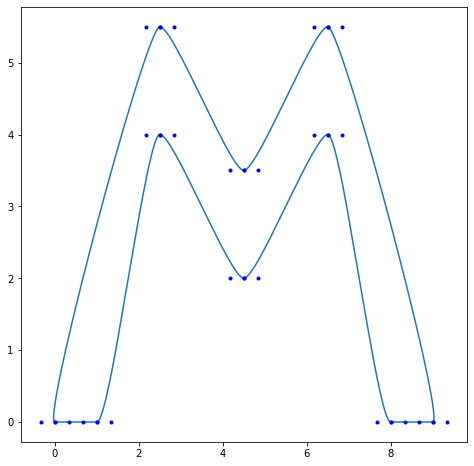

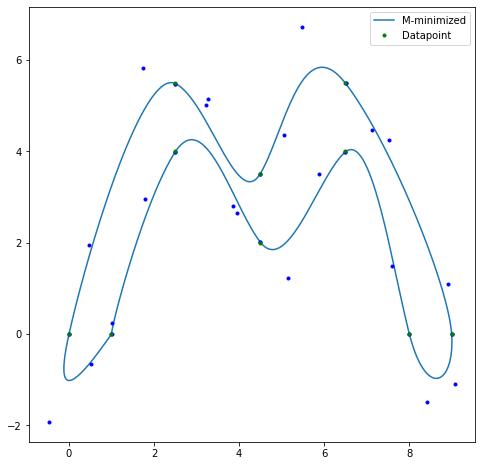

In [2497]:
M = np.array([[0,0], [2.5, 5.5],  [4.5, 3.5], [6.5,5.5], [9,0], [8,0], [6.5,4], [4.5, 2], [2.5,4],[1,0]])
MV = np.array([[-1,0], [1, 0],  [1, 0], [1,0], [-1,0], [-1,0], [-1,0], [-1,0], [-1,0], [-1,0], [-1,0]])

#M = np.array([[1,9],[1,1],[4,1],[4,3],[2,3],[2,4],[3,4],[3,6],[2,6],[2,7],[4,7],[4,9]])
#MV = np.array([[-0.5,-0.5],[0.5,-0.5],[0.5,0.5],[-0.5,0.5],[-0.5,0.5],[0.5,0.5],[0.5,0.5],[-0.5,0.5],[-0.5,0.5],[0.5,0.5],[0.5,0.5],[-0.5,0.5]])

P_M = interpolate_periodic(M,MV) 
n,m,d = np.shape(P_M)
T_M = np.linspace(0,m,1000)

Q_M = compress_P(P_M)

l = 10000
d = gradient_F(Q_M, P_M[0], l)
i = 0
maxiter = 10000

while(np.linalg.norm(d) > 0.1 and i < maxiter ):
    d = gradient_G(Q_M, M, l)
    Q_M += -0.0001*d    
    i +=1
print(np.linalg.norm(d), i)

Q_M2 = make_grid(extend_P(Q_M))
curve_Q = composite_Bezier(Q_M2, T_M)
curve_P = composite_Bezier(P_M, T_M)

print(Q_M2[:,-1])

plt.figure(figsize = (8,8))    
plt.plot(curve_P[:,0], curve_P[:,1], label ='M-original')    
plt.plot(P_M[:,:,0], P_M[:,:,1], 'b.')

plt.figure(figsize = (8,8))    
plt.plot(curve_Q[:,0], curve_Q[:,1], label ='M-minimized')
plt.plot(Q_M2[:,:,0], Q_M2[:,:,1], 'b.')
plt.plot(M[:,0], M[:,1], 'g.', label = 'Datapoint')

plt.legend()


In [2409]:
print(P_M[:,-2])
print(Q_M2[:,-2])

[[2.5        4.        ]
 [2.16666667 4.33333333]
 [1.         0.33333333]
 [1.         0.        ]]
[[2.49889539 3.98936063]
 [1.77973494 2.96038432]
 [1.00874296 0.24229813]
 [1.00274053 0.00811802]]
